In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
cd /content/drive/MyDrive/kaggle

/content/drive/MyDrive/kaggle


In [ ]:
# !kaggle competitions submit -c titanic -f gender_submission.csv -m "Message"

In [2]:
import os  
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/kaggle"   

In [3]:
!chmod 600 kaggle.json  

chmod: cannot access 'kaggle.json': No such file or directory


In [ ]:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes         45           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        105           False  
store-sales-time-series-forecasting            2030-06-30 23:59:00  Getting Started  Knowledge        623           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        124           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       1325           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      14856           False  
house-pr

In [5]:
!kaggle competitions download -c digit-recognizer

 98% 15.0M/15.3M [00:00<00:00, 31.2MB/s]
100% 15.3M/15.3M [00:00<00:00, 26.5MB/s]


In [6]:
!unzip digit-recognizer.zip

Archive:  digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [7]:
train_data = pd.read_csv("train.csv", header = 0)
test_data = pd.read_csv("test.csv", header = 0)
train_data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
X_train = train_data.iloc[:, 1:].to_numpy().reshape(-1, 28, 28)
X_test = train_data.iloc[:, 0]
y_train = test_data.to_numpy().reshape(-1, 28, 28)

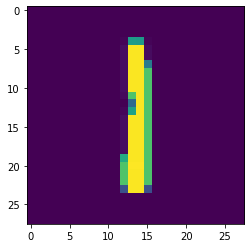

In [11]:
plt.figure()
plt.imshow(X_train[2])

In [12]:
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, 3, activation='relu', input_shape=(28, 28, 1)))
model.add(layers.Conv2D(64, 3, activation='relu'))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(64, 3, activation='relu'))
model.add(layers.Conv2D(128, 3, activation='relu'))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [23]:
X_train = X_train.reshape(-1, 28, 28, 1)
y_train = y_train.reshape(-1, 28, 28, 1)

In [14]:
history = model.fit(X_train, X_test, epochs=15, batch_size=128)

Epoch 1/15
329/329 [==============================] - 15s 9ms/step - loss: 1.5954 - acc: 0.5876
Epoch 2/15
329/329 [==============================] - 3s 9ms/step - loss: 0.2949 - acc: 0.9111
Epoch 3/15
329/329 [==============================] - 3s 9ms/step - loss: 0.1938 - acc: 0.9430
Epoch 4/15
329/329 [==============================] - 3s 9ms/step - loss: 0.1579 - acc: 0.9528
Epoch 5/15
329/329 [==============================] - 3s 9ms/step - loss: 0.1298 - acc: 0.9619
Epoch 6/15
329/329 [==============================] - 3s 9ms/step - loss: 0.1167 - acc: 0.9653
Epoch 7/15
329/329 [==============================] - 3s 9ms/step - loss: 0.1026 - acc: 0.9700
Epoch 8/15
329/329 [==============================] - 3s 9ms/step - loss: 0.0948 - acc: 0.9721
Epoch 9/15
329/329 [==============================] - 3s 9ms/step - loss: 0.0893 - acc: 0.9737
Epoch 10/15
329/329 [==============================] - 3s 8ms/step - loss: 0.0844 - acc: 0.9750
Epoch 11/15
329/329 [===========================

In [24]:
y_pred = model.predict(y_train)

In [28]:
import numpy as np

answer = []
for i in y_pred:
  answer.append(list(i).index(max(i)))

In [31]:
answer = pd.DataFrame(np.array(answer).T)

In [32]:
answer['ImageId'] = np.arange(1, 28001)

In [33]:
answer['Label'] = answer.iloc[:, 0]

In [34]:
answer.to_csv('submission.csv', columns=['ImageId', 'Label'], index=False)

In [ ]:
pd_read = pd.read_csv('/content/drive/MyDrive/kaggle/submission.csv', header=0)
pd_read

,ImageId,Label
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
27995,27995,0
27996,27996,0
27997,27997,0
27998,27998,0


In [35]:
!kaggle competitions submit -c digit-recognizer -f submission.csv -m "Message"

100% 208k/208k [00:04<00:00, 44.6kB/s]
Successfully submitted to Digit Recognizer